In [8]:
# Author:ploubet
# Jupyter Notebook (via Jupytext) for computing "extractive" intermediate flows from activities, and comparing them to elementary flows
# Import functions from the script intermediate_flows.py and execute the analysis.


import sys
import os
import logging
import pandas as pd
import matplotlib.pyplot as plt


# Add current folder and 'main code' subfolder to python path
sys.path.insert(0, os.getcwd())
main_code = os.path.join(os.getcwd(), 'main code')
if os.path.isdir(main_code):
    sys.path.insert(0, main_code)

# Import your analysis functions
print('Import paths:', sys.path[:3], '...')
    
# Import the analysis functions
from intermediate_flows import (
    get_filtered_activities,
    compute_lca_flows,
    summarize_records,
    plot_scatter,
    plot_activity_contributions,
    CONFIG,
)
# Configure logging to display INFO messages in the notebook
logging.basicConfig(level=logging.INFO)


Import paths: ['C:\\Users\\Ploubet001\\Dropbox\\Travail\\LCA_tools\\lca-inter-flows\\main', 'C:\\Users\\Ploubet001\\Dropbox\\Travail\\LCA_tools\\lca-inter-flows\\main', 'C:\\Users\\Ploubet001\\.conda\\envs\\ab2\\python311.zip'] ...


## 1. Database Selection
#Modify the `filter_keyword` below to control which activities are selected.

In [9]:
# List available databases from CONFIG
available_dbs = CONFIG['databases']
print("Available databases:", available_dbs)
# User can set an index here to pick (e.g., 0 for first)
selected_db_index = 0  # <-- change this to select a different database
# Use the selected database
db = available_dbs[selected_db_index]
print(f"Using database = '{db}' (index {selected_db_index})")


Available databases: ['ecoinvent-3.10-cutoff']
Using database = 'ecoinvent-3.10-cutoff' (index 0)


## 2. Activity Selection
Modify the `filter_keyword` below to control which activities are selected.

In [10]:
# filtering the activities (from ecoinvent)
filter_keyword = "market for battery,"
# Override CONFIG for notebook session
CONFIG["filter_keyword"] = filter_keyword
print(f"Using filter_keyword = '{filter_keyword}'")

# List all matching activities:
db = CONFIG['databases'][0]
from brightway2 import Database
all_acts = [act for act in Database(db) if filter_keyword in act['name'].lower()]
print(f"Found {len(all_acts)} matching activities:")
for i, act in enumerate(all_acts[:10]):
    print(f"  {i}: {act['name']} | {act.get('reference product','')} | {act['location']}")

# Uncomment and edit the next line to manually select specific indices
# selected_indices = [0, 2, 5]
# activities = [all_acts[i] for i in selected_indices]

# By default, sample randomly based on CONFIG.sample_size
activities = get_filtered_activities(db)

Using filter_keyword = 'market for battery,'
Found 8 matching activities:
  0: market for battery, Li-ion, NMC811, rechargeable, prismatic | battery, Li-ion, NMC811, rechargeable, prismatic | GLO
  1: market for battery, Li-ion, NMC111, rechargeable, prismatic | battery, Li-ion, NMC111, rechargeable, prismatic | GLO
  2: market for battery, Li-ion, NCA, rechargeable, prismatic | battery, Li-ion, NCA, rechargeable, prismatic | GLO
  3: market for battery, lead acid, rechargeable, stationary | battery, lead acid, rechargeable, stationary | GLO
  4: market for battery, Li-ion, LiMn2O4, rechargeable, prismatic | battery, Li-ion, LiMn2O4, rechargeable, prismatic | GLO
  5: market for battery, Li-ion, LFP, rechargeable, prismatic | battery, Li-ion, LFP, rechargeable, prismatic | GLO
  6: market for battery, NiMH, rechargeable, prismatic | battery, NiMH, rechargeable, prismatic | GLO
  7: market for battery, NaCl | battery, NaCl | GLO


## 3. Compute intermediate flows, elementary flows, and supply risks

In [11]:
records = compute_lca_flows(db, activities)
print(f"Computed LCA flows for {len(records)} activities.")

INFO:bw2calc:Created LCA object
INFO:bw2calc:Created LCA object
INFO:bw2calc:Created LCA object
INFO:bw2calc:Created LCA object
INFO:bw2calc:Created LCA object
INFO:bw2calc:Created LCA object
INFO:bw2calc:Created LCA object
INFO:bw2calc:Created LCA object


Computed LCA flows for 8 activities.


## 4. Comparison of results with intermediate AND elemntary flows

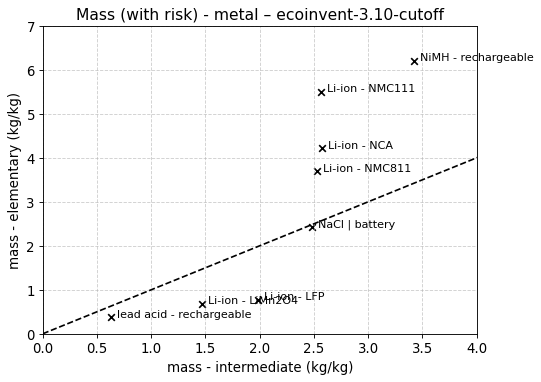

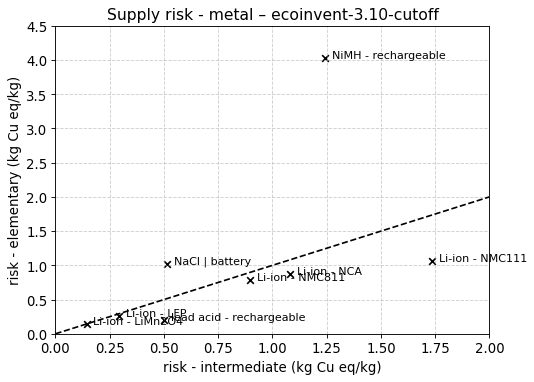

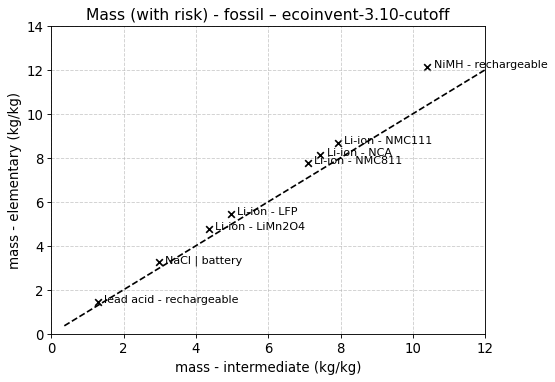

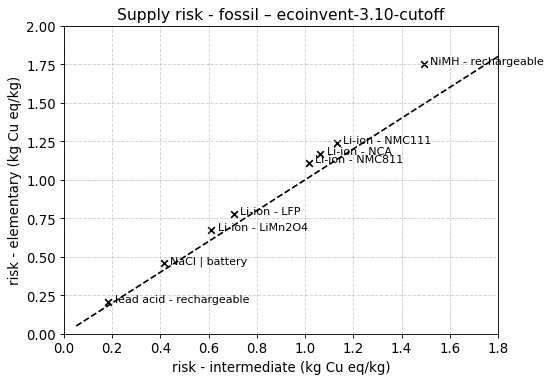

In [12]:
summary_df = summarize_records(records)
all_results = {cat: summary_df[summary_df['Category'] == cat] for cat in ['metal','fossil']}

for cat, df in all_results.items():
    plot_scatter(
        df,
        'risky_int_mass', 'risky_elem_mass',
        'mass - intermediate (kg/kg)',
        'mass - elementary (kg/kg)',
        f'Mass (with risk) - {cat} – {db}',dpi=80
    )
    plot_scatter(
        df,
        'risk_int', 'risk_elem',
        'risk - intermediate (kg Cu eq/kg)',
        'risk - elementary (kg Cu eq/kg)',
        f'Supply risk - {cat} – {db}',dpi=80
    )

## 5. Contribution Charts for n activities

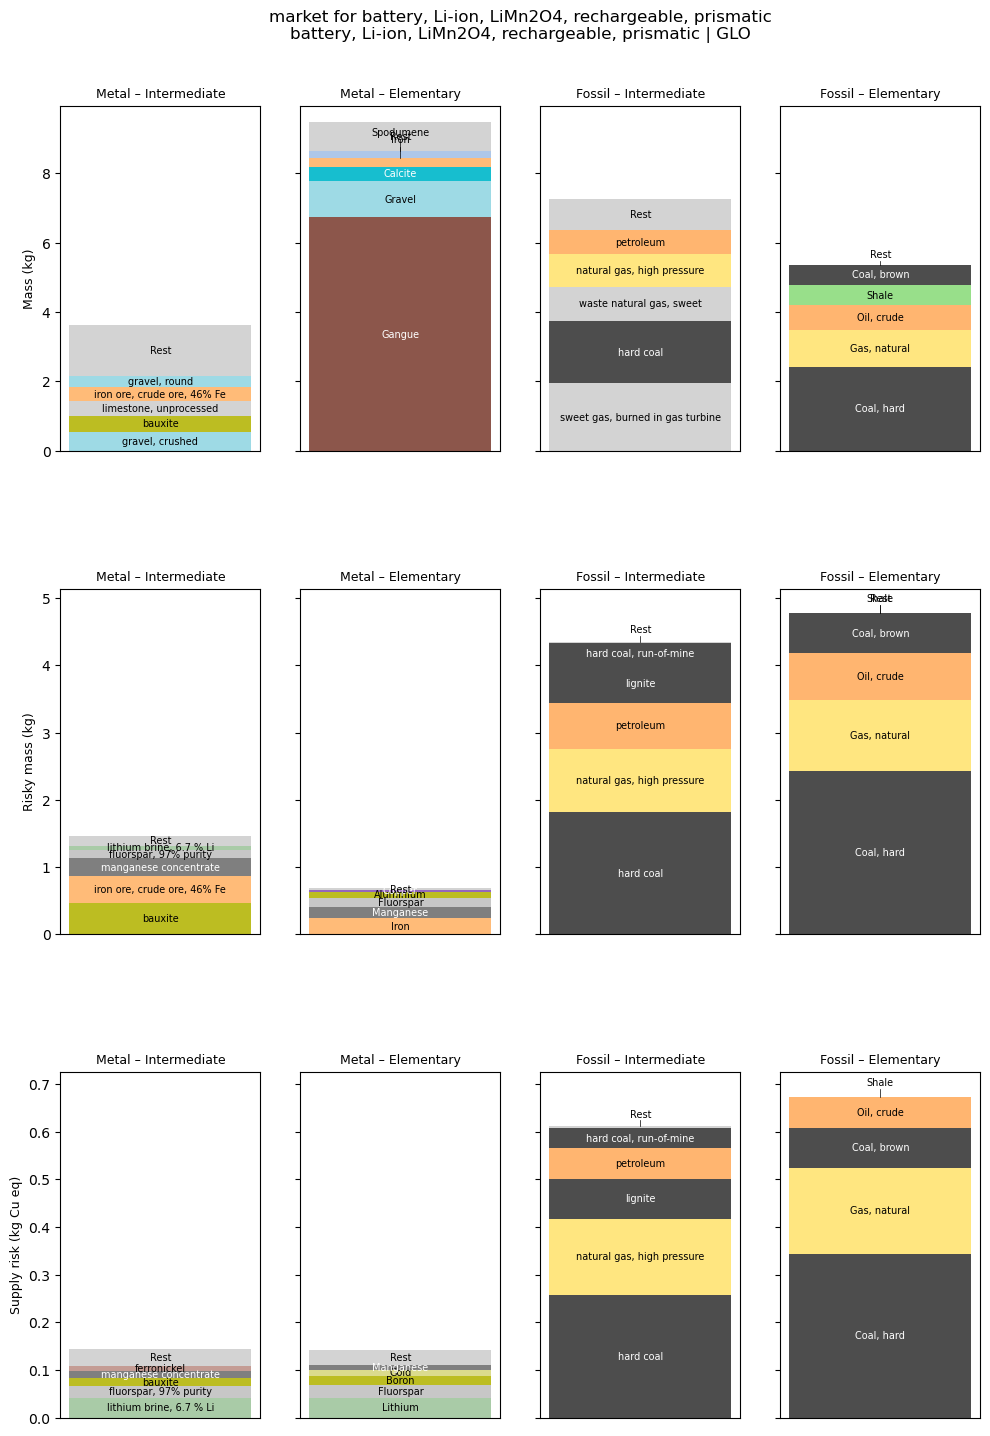

In [13]:
# Plot contribution charts for up to 5 activities
plot_activity_contributions(records, top_n=5, max_activities=1,dpi=100)

In [ ]:
# End of notebook. Adjust `filter_keyword` or `selected_indices` above to refine the analysis.